## Homework

### Dataset

In this homework, we will use the California Housing Prices from [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

Here's a wget-able [link](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv):

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
```

The goal of this homework is to create a regression model for predicting housing prices (column `'median_house_value'`).

### EDA

* Load the data.
* Look at the `median_house_value` variable. Does it have a long tail? 

In [2]:
import pandas as pd
import numpy as np

data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'

!wget $data

"wget" не является внутренней или внешней
командой, исполняемой программой или пакетным файлом.


In [82]:
df = pd.read_csv(data)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

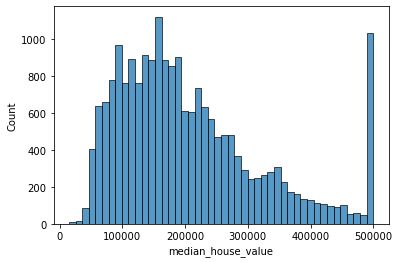

In [84]:
sns.histplot(df.median_house_value) #, bins=50)

Yes, distribution of median_house_value variable has a long tail.

### Features

For the rest of the homework, you'll need to use only these columns:

* `'latitude'`,
* `'longitude'`,
* `'housing_median_age'`,
* `'total_rooms'`,
* `'total_bedrooms'`,
* `'population'`,
* `'households'`,
* `'median_income'`,
* `'median_house_value'`

Select only them.

In [85]:
features = [
    'latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'median_house_value'
           ]

df = df[features]
df

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


### Question 1

Find a feature with missing values. How many missing values does it have?
- **207**
- 307
- 408
- 508

In [86]:
df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

### Question 2

What's the median (50% percentile) for variable 'population'?
- 1133
- 1122
- **1166**
- 1188

In [87]:
df['population'].describe()

count    20640.000000
mean      1425.476744
std       1132.462122
min          3.000000
25%        787.000000
50%       1166.000000
75%       1725.000000
max      35682.000000
Name: population, dtype: float64

### Split the data

* Shuffle the initial dataset, use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Make sure that the target value ('median_house_value') is not in your dataframe.
* Apply the log transformation to the median_house_value variable using the `np.log1p()` function.


In [13]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

n, n_val, n_test, n_train

(20640, 4128, 4128, 12384)

In [14]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

In [17]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]
len(df_train), len(df_val), len(df_test)

(12384, 4128, 4128)

In [18]:
df_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
20046,36.06,-119.01,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0
3024,35.14,-119.46,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0
15663,37.80,-122.44,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0
20484,34.28,-118.72,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0
9814,36.62,-121.93,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0


In [19]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [20]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [21]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [23]:
df_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,36.06,-119.01,25.0,1505.0,NaN,1392.0,359.0,1.6812
1,35.14,-119.46,30.0,2943.0,NaN,1565.0,584.0,2.5313
2,37.80,-122.44,52.0,3830.0,NaN,1310.0,963.0,3.4801
3,34.28,-118.72,17.0,3051.0,NaN,1705.0,495.0,5.7376
4,36.62,-121.93,34.0,2351.0,NaN,1063.0,428.0,3.7250



### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:
- With 0
- With mean
- **Both are equally good**



In [36]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return round(np.sqrt(mse), 2)

def prepare_X_zero(df):
    df_num = df
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

def prepare_X_mean(df):
    df_num = df
    df_num['total_bedrooms'] = df_num['total_bedrooms'].fillna(df_num['total_bedrooms'].median())
    X = df_num.values
    return X

In [40]:
X_train_zero = prepare_X_zero(df_train)

w0, w = train_linear_regression(X_train_zero, y_train)

y_pred = w0 + X_train_zero.dot(w)

w0, w

(-11.686975241610243,
 array([-2.82087184e-01, -2.76255120e-01,  2.91329621e-03, -8.64531514e-06,
         1.50811922e-04, -2.08205659e-04,  5.69546573e-04,  1.71308139e-01]))

0.34

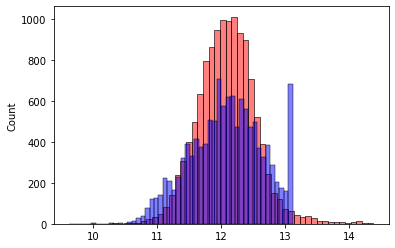

In [47]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)
rmse(y_train, y_pred)

In [43]:
X_val_zero = prepare_X_zero(df_val)
y_pred = w0 + X_val_zero.dot(w)
rmse(y_val, y_pred)

0.33

In [44]:
X_train_mean = prepare_X_mean(df_train)

w0, w = train_linear_regression(X_train_mean, y_train)

y_pred = w0 + X_train_mean.dot(w)

w0, w

(-11.753065907839352,
 array([-2.82166266e-01, -2.76757635e-01,  2.93028421e-03, -1.45062254e-05,
         2.41468074e-04, -2.04002173e-04,  4.92851655e-04,  1.72979157e-01]))

0.34

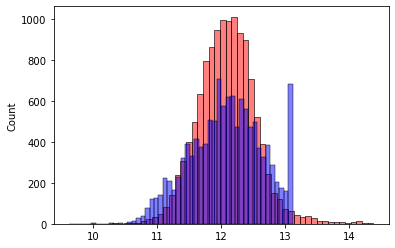

In [46]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)
rmse(y_train, y_pred)

In [48]:
X_val_mean = prepare_X_mean(df_val)
y_pred = w0 + X_val_mean.dot(w)
rmse(y_val, y_pred)

0.33

Both methods are equally good according to RMSE

### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

Options:
- **0**
- 0.000001
- 0.001
- 0.0001



In [49]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [50]:
X_train = prepare_X_zero(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X_zero(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.33

In [75]:
r_list = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]


for r in r_list:
    # min_rmse = 1000
    
    X_train = prepare_X_zero(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X_zero(df_val)
    y_pred = w0 + X_val.dot(w)
    rmse(y_val, y_pred)

    score = rmse(y_val, y_pred)
    
    # min_rmse = score if score < min_rmse else min_rmse
    
    print("r =", r, f'{(10 - len(str(r))) * " "}',"w0 =", w0, f'{(25 - len(str(w0))) * " "}', "score =", score)
#print("min_rmse", min_rmse)

r = 0           w0 = -11.753065907839352        score = 0.33
r = 1e-06       w0 = -11.75304972716687         score = 0.33
r = 0.0001      w0 = -11.7514480655525          score = 0.33
r = 0.001       w0 = -11.736907498383292        score = 0.33
r = 0.01        w0 = -11.593456233857026        score = 0.33
r = 0.1         w0 = -10.330762645069981        score = 0.33
r = 1           w0 = -4.94409128150871          score = 0.33
r = 5           w0 = -1.4885725360387094        score = 0.34
r = 10          w0 = -0.7933211979144272        score = 0.34


### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.

Options:
- 0.16
- 0.00005
- **0.005**
- 0.15555



In [104]:
seed_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

def split_dataset(df, seed):
    n = len(df)

    # split parameters
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test

    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)
    
    # split dataset into 3 parts
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train + n_val]]
    df_test = df.iloc[idx[n_train + n_val:]]
    
    # reset indexes
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    # normalize target variable
    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)
    
    # drop target variable from the dataset
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    return df_train, df_val, df_test, y_train, y_val, y_test
    
scores = []

for seed_value in seed_values:

    df_train, df_val, df_test, y_train, y_val, y_test = split_dataset(df, seed_value)
    
    X_train_zero = prepare_X_zero(df_train)
    w0, w = train_linear_regression(X_train_zero, y_train)
    y_pred = w0 + X_train_zero.dot(w)

    X_val_zero = prepare_X_zero(df_val)
    y_pred = w0 + X_val_zero.dot(w)
    score = rmse(y_val, y_pred)
    
    scores.append(score)
    
    print('for seed =', seed_value, 'score =', score, '\n')
    print(df_train.head(n=3))
    
scores
    

for seed = 0 score = 0.34 

   latitude  longitude  housing_median_age  total_rooms  total_bedrooms  \
0     32.58    -117.05                22.0       2101.0           399.0   
1     33.92    -117.97                32.0       2620.0           398.0   
2     38.65    -121.84                29.0       3167.0           548.0   

   population  households  median_income  
0      1551.0       371.0         4.1518  
1      1296.0       429.0         5.7796  
2      1554.0       534.0         4.3487  
for seed = 1 score = 0.34 

   latitude  longitude  housing_median_age  total_rooms  total_bedrooms  \
0     34.06    -118.36                39.0       2810.0           670.0   
1     36.78    -119.78                37.0       2185.0           455.0   
2     37.73    -122.42                46.0       1819.0           411.0   

   population  households  median_income  
0      1109.0       624.0         3.2500  
1      1143.0       438.0         1.9784  
2      1534.0       406.0         4.0132 

[0.34, 0.34, 0.33, 0.34, 0.34, 0.34, 0.35, 0.34, 0.35, 0.34]

In [106]:
round(np.std(scores), 3)

0.005

### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

Options:
- **0.35**
- 0.135
- 0.450
- 0.245



In [109]:
seed_values = [9]
df_train, df_val, df_test, y_train, y_val, y_test = split_dataset(df, seed_values)

df_full_train = pd.concat([df_train, df_val])

df_full_train = df_full_train.reset_index(drop=True)

X_full_train = prepare_X_zero(df_full_train)
X_full_train

array([[ 3.8250e+01, -1.2204e+02,  3.8000e+01, ...,  6.3200e+02,
         2.5400e+02,  2.8438e+00],
       [ 3.7770e+01, -1.2086e+02,  2.8000e+01, ...,  5.3500e+02,
         2.3200e+02,  2.3523e+00],
       [ 3.4070e+01, -1.1828e+02,  1.4000e+01, ...,  2.2260e+03,
         7.9200e+02,  2.2552e+00],
       ...,
       [ 3.7970e+01, -1.2120e+02,  3.9000e+01, ...,  2.7000e+02,
         9.7000e+01,  6.0582e+00],
       [ 3.7780e+01, -1.2241e+02,  5.2000e+01, ...,  1.5200e+03,
         6.1400e+02,  1.4554e+00],
       [ 3.8050e+01, -1.2130e+02,  5.2000e+01, ...,  6.2000e+01,
         2.5000e+01,  1.1500e+00]])

In [110]:
y_full_train = np.concatenate([y_train, y_val])

w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

X_test = prepare_X_zero(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

0.34

## Submit the results
- Submit your results here: https://forms.gle/WCVb4KMNsgbkuJtr6
- If your answer doesn't match options exactly, select the closest one.
- You can submit your solution multiple times. In this case, only the last submission will be used

## Deadline

The deadline for submitting is, 19 September 2022, 23:00 CET. After that, the form will be closed.